# **Curvas ROC - Machine Learning 20**

### Bibliotecas

In [1]:
# Libs
import numpy as np
import pandas as pd

### Base de Dados

In [2]:
# Função de carregamento de dados
def carregarDados(arquivo, deli):
    ds = pd.read_csv(arquivo, sep=deli)
    # Amostra
    X = ds.iloc[:,:-1].values
    # Variável independente 
    y = ds.iloc[:,-1].values
    return X, y, ds

### Substituído Valores Faltante

In [3]:
# Função de Substituição dos valores
def valorFaltante(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

### Transformando os valores

In [4]:
# Função de Transformação dos Valores
def transform(X):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

    #one hot encoding
    D = pd.get_dummies(X[:,0]).values
    
    X = X[:,1:]
    for ii in range(0, D.shape[1]):
        X = np.insert(X, X.shape[1], D[:,ii], axis=1)
    X = X[:,:X.shape[1] - 1]

    return X

### Dividindo a base de Treino e Teste

In [5]:
# Função de Treino e Teste
def treinoTeste(X, y, testSize):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

### Normalizando o Conjunto de Dados

In [6]:
# Função de Normalização de dados
def normalizarDados(X):
    from sklearn.preprocessing import StandardScaler
    scaleobj = StandardScaler()
    X = scaleobj.fit_transform(X.astype(float))

    return X, scaleobj

### Regressão Logística 

In [7]:
# Função do Algorítimo de Regressão Logística
def regressaoLogistica(X_train, y_train, X_test):
    from sklearn.linear_model import LogisticRegression

    regressor = LogisticRegression(solver='lbfgs')
    regressor.fit(X_train[0], y_train)

    return regressor

### ROC multiclasse One-vs-Rest

In [8]:
def rodarRoc(y_score, y_test):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    areaUnderCurve = auc(fpr, tpr)

    rocCurve = {}
    rocCurve['taxa_falso_positivo'] = fpr
    rocCurve['taxa_verdadeiro_positivo'] = tpr
    rocCurve['area_sofrida'] = areaUnderCurve

    plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(areaUnderCurve))
    plt.plot([0, 1], [0, 1], 'k--')  # Linha pontilhada diagonal (linha de referência)
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

### Previsões do modelo

In [9]:
# Função de previsão
def previsaoModelo(regressor , X_test):
    previsao = regressor.predict(X_test[0])
    return previsao

### Matriz de Confusão 

In [10]:
# Função de matriz de confusão 
def matrizConfusao(regressor, y_Test, y_Pred):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_Test, y_Pred)

    return cm

### Valor da Accuracy 

In [11]:
# Função para calcular o valor de Accuracy
def valorAccuracy(matrizConfusao):
    valor_accuracy = (matrizConfusao[0][0] + matrizConfusao[1][1]) / (matrizConfusao[0][0] + matrizConfusao[1][0] + matrizConfusao[0][1] + matrizConfusao[1][1])
    print(valor_accuracy * 100)

### Rodando Todas as Funções

In [12]:
# Função que roda todas as funções
def rodarRegressao(dados):
    X, y, csv = carregarDados(dados, ',')
    X = valorFaltante(X, 2, 3)

    X = transform(X)
    X = transform(X)

    XTrain, XTest, yTrain, yTest = treinoTeste(X, y, 0.15)
    XTrain = normalizarDados(XTrain)
    XTest = normalizarDados(XTest)

    regressor = regressaoLogistica(XTrain, yTrain, XTest)
    y_pred = previsaoModelo(regressor, XTest)

    return rodarRoc(y_pred, yTest)

### Resultado Final

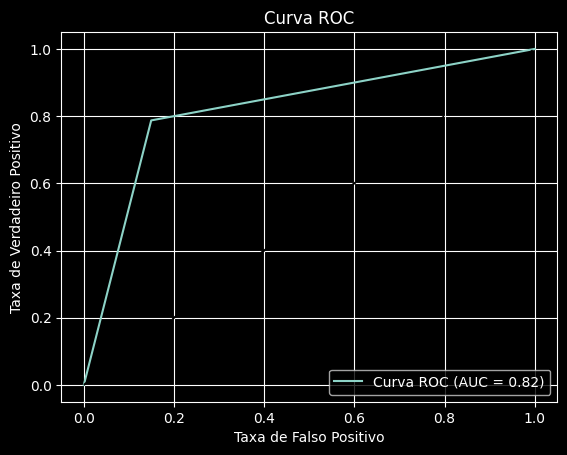

In [13]:
# Rodando a função 
confusionMatrix = rodarRegressao('../data/titanic.csv')
